<a href="https://colab.research.google.com/github/Thanasiri/Python-35-days-challenge/blob/master/Assignment%232%20IMDb_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb

https://bit.ly/2TXtBhc

เว็บ IMDb รวบรวมข้อมูลเกี่ยวกับภาพยนตร์ต่างๆ และตัดข้อมูลบางส่วนมาให้ใช้ทำการทดลองต่างๆ ได้ https://www.imdb.com/interfaces/

โจทย์นี้คัดกรอง [ข้อมูลบางส่วนใน IMDb](https://drive.google.com/file/d/1V5VNg1WTMTS_eEOQqylektM9ZwdG1uq2/view?usp=sharing) มา โดยโดยมีไฟล์นี้อยู่

**filteredCast.tsv**
- tconst (string) - alphanumeric unique identifier of the title #idของtitle
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person #idของบุคคลนั้นๆ
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N' #บทบาทของบุคคลกรณีเป้นดารา

**filteredTitle.tsv**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**filteredStar.tsv**
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

# โจทย์

1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ
2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)
3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน
4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action
5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท
6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน
7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย
8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


# 1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ

In [ ]:
#solution
import pandas as pd
from pandas import Series, DataFrame
cast = pd.read_csv("filteredCast-v2.tsv", sep='\t')
star = pd.read_csv("filteredStar-v2.tsv", sep='\t')
title = pd.read_csv("filteredTitle-v2.tsv", sep='\t')
title.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [ ]:
title

In [ ]:
tt = title[['genres','primaryTitle']]
tt.head()

,genres,primaryTitle
0,"Comedy,Musical",While Supplies Last
1,"Adventure,Drama,Music",Electric Heart
2,Drama,Rain Doll
3,Drama,The Blessed Ones
4,"Action,Comedy",Golmaal 3


In [ ]:
s = tt['genres'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del tt['genres']
df = tt.join(s)

In [ ]:
df

,primaryTitle,genres
0,While Supplies Last,Comedy
0,While Supplies Last,Musical
1,Electric Heart,Adventure
1,Electric Heart,Drama
1,Electric Heart,Music
...,...,...
6290,Vashti Bunyan: From Here to Before,Documentary
6291,Casa d'appuntamento... puttana dalla testa ai ...,Adult
6292,7 Deadly Sins: Inside the Ecomm Cult,Biography
6292,7 Deadly Sins: Inside the Ecomm Cult,Comedy


In [ ]:
df['genres'].unique()
print('ภาพยนต์มีทั้งหมด ', len(df['genres'].unique()),' ประเภท')

ภาพยนต์มีทั้งหมด  25  ประเภท


In [ ]:
by_genres = df.groupby(['genres']).count()
by_genres

,primaryTitle
genres,
Action,733
Adult,56
Adventure,277
Animation,132
Biography,178
Comedy,1694
Crime,488
Documentary,484
Drama,3041


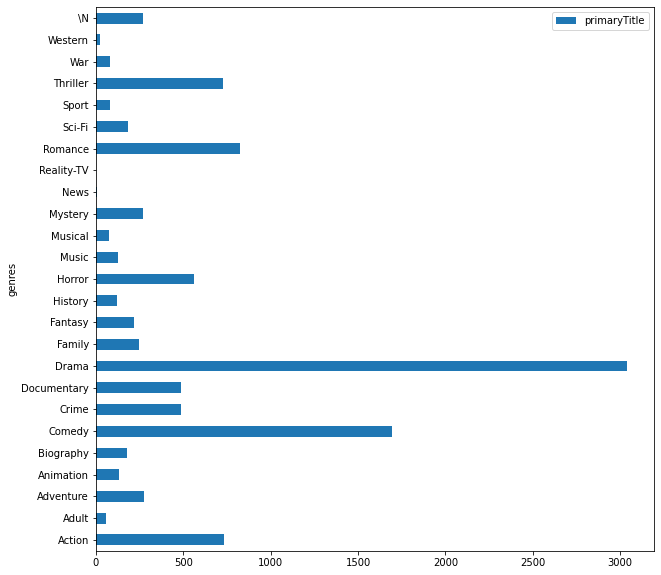

In [ ]:
by_genres.plot.barh(figsize=(10,10))

# 2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)

In [ ]:
#solution
star

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000103,Fairuza Balk,1974,\N,"actress,soundtrack","tt0181875,tt0089908,tt0120586,tt0115963"
1,nm0000106,Drew Barrymore,1975,\N,"producer,actress,soundtrack","tt0120888,tt0343660,tt0151738,tt0120631"
2,nm0000117,Neve Campbell,1973,\N,"actress,producer,soundtrack","tt0134084,tt1262416,tt0120082,tt0117571"
3,nm0000132,Claire Danes,1979,\N,"actress,producer,soundtrack","tt0274558,tt0108872,tt1796960,tt0117509"
4,nm0000138,Leonardo DiCaprio,1974,\N,"actor,producer,writer","tt0120338,tt0993846,tt1375666,tt0407887"
...,...,...,...,...,...,...
7832,nm9561903,Amir Mohammad Zand,1978,\N,"actor,director,writer","tt7900836,tt4532764,tt6851202,tt7902726"
7833,nm9824219,Justin Duffy,1982,\N,"art_department,actor,producer","tt8590300,tt8713534,tt8907070,tt8386612"
7834,nm9886120,Vigithan Sokka,1982,\N,"director,actor",tt8486890
7835,nm9979083,Jeff Rambo,1975,\N,actor,"tt10223168,tt8712572"


In [ ]:
st = star[['primaryProfession','primaryName']]
st.head()

,primaryProfession,primaryName
0,"actress,soundtrack",Fairuza Balk
1,"producer,actress,soundtrack",Drew Barrymore
2,"actress,producer,soundtrack",Neve Campbell
3,"actress,producer,soundtrack",Claire Danes
4,"actor,producer,writer",Leonardo DiCaprio


In [ ]:
x = st['primaryProfession'].str.split(',').apply(Series, 1).stack()
x.index = x.index.droplevel(-1)
x.name = 'primaryProfession'
del st['primaryProfession']

In [ ]:
ds = st.join(x)
ds 

,primaryName,primaryProfession
0,Fairuza Balk,actress
0,Fairuza Balk,soundtrack
1,Drew Barrymore,producer
1,Drew Barrymore,actress
1,Drew Barrymore,soundtrack
...,...,...
7834,Vigithan Sokka,actor
7835,Jeff Rambo,actor
7836,Fanny Hozleiter,director
7836,Fanny Hozleiter,actress


In [ ]:
by_pro = ds.groupby(['primaryProfession']).count()
by_pro.head(2)

,primaryName
primaryProfession,
actor,4300
actress,3537


In [ ]:
print('มีนักแสดงชาย 4300 คน และนักแสดงหญิง 3537 คน')

มีนักแสดงชาย 4300 คน และนักแสดงหญิง 3537 คน


# 3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน

In [ ]:
#solution
star.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000103,Fairuza Balk,1974,\N,"actress,soundtrack","tt0181875,tt0089908,tt0120586,tt0115963"
1,nm0000106,Drew Barrymore,1975,\N,"producer,actress,soundtrack","tt0120888,tt0343660,tt0151738,tt0120631"
2,nm0000117,Neve Campbell,1973,\N,"actress,producer,soundtrack","tt0134084,tt1262416,tt0120082,tt0117571"
3,nm0000132,Claire Danes,1979,\N,"actress,producer,soundtrack","tt0274558,tt0108872,tt1796960,tt0117509"
4,nm0000138,Leonardo DiCaprio,1974,\N,"actor,producer,writer","tt0120338,tt0993846,tt1375666,tt0407887"


In [ ]:
star['deathYear'].value_counts().head()

\N      7742
2019      11
2016       8
2009       8
2017       8
Name: deathYear, dtype: int64

In [ ]:
star['years'] = 2020 - star['birthYear']
star.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,years
0,nm0000103,Fairuza Balk,1974,\N,"actress,soundtrack","tt0181875,tt0089908,tt0120586,tt0115963",46
1,nm0000106,Drew Barrymore,1975,\N,"producer,actress,soundtrack","tt0120888,tt0343660,tt0151738,tt0120631",45
2,nm0000117,Neve Campbell,1973,\N,"actress,producer,soundtrack","tt0134084,tt1262416,tt0120082,tt0117571",47


In [ ]:
year = star[['deathYear', 'years','primaryName']]
year.head(3)

,deathYear,years,primaryName
0,\N,46,Fairuza Balk
1,\N,45,Drew Barrymore
2,\N,47,Neve Campbell


In [ ]:
by_deathyear = year.groupby(['deathYear','years']).count()
by_deathyear

primaryName
deathYear years             
1993      46               1
1995      45               1
          49               1
1996      49               1
2000      44               1
...                      ...
\N        45             472
          46             447
          47             505
          48             511
          49             498

[99 rows x 1 columns]

In [ ]:
alive = by_deathyear.loc[[r'\N'], : ]
alive

primaryName
deathYear years             
\N        31             213
          32             233
          33             288
          34             328
          35             317
          36             365
          37             389
          38             438
          39             430
          40             448
          41             495
          42             460
          43             442
          44             463
          45             472
          46             447
          47             505
          48             511
          49             498

In [ ]:
alive.unstack(level=0)

,primaryName
deathYear,\N
years,
31,213
32,233
33,288
34,328
35,317
36,365
37,389
38,438


# 4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action

In [ ]:
#solution
cast
title.head(2)
ttx = title[['tconst','genres']]
ttx.head(2)

,tconst,genres
0,tt0192789,"Comedy,Musical"
1,tt4914592,"Adventure,Drama,Music"


In [ ]:
sx = ttx['genres'].str.split(',').apply(Series, 1).stack()
sx.index = sx.index.droplevel(-1)
sx.name = 'genres'
del ttx['genres']
dfx = ttx.join(sx)

In [ ]:
dfx

,tconst,genres
0,tt0192789,Comedy
0,tt0192789,Musical
1,tt4914592,Adventure
1,tt4914592,Drama
1,tt4914592,Music
...,...,...
6290,tt1310674,Documentary
6291,tt0204187,Adult
6292,tt1520836,Biography
6292,tt1520836,Comedy


In [ ]:
cast.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0099462,1,nm0000433,actor,\N,"[""Barry Davis""]"
1,tt0101281,2,nm0253327,actor,\N,"[""Dag Sjöborg""]"
2,tt0101301,3,nm0256121,actor,\N,"[""Ethan O'Fallon""]"


In [ ]:
castx = cast.loc[(cast['category']=='actor') | (cast['category']=='actress')]
castx

,tconst,ordering,nconst,category,job,characters
0,tt0099462,1,nm0000433,actor,\N,"[""Barry Davis""]"
1,tt0101281,2,nm0253327,actor,\N,"[""Dag Sjöborg""]"
2,tt0101301,3,nm0256121,actor,\N,"[""Ethan O'Fallon""]"
3,tt0101635,3,nm0692018,actress,\N,"[""Curly Sue""]"
4,tt0102183,2,nm0032643,actress,\N,"[""Kathy""]"
...,...,...,...,...,...,...
10595,tt9892338,4,nm7797362,actor,\N,"[""Amir""]"
10596,tt9892546,1,nm1647994,actress,\N,"[""Karma""]"
10597,tt9892546,3,nm2648766,actor,\N,"[""Aladdin""]"
10598,tt9916428,6,nm8680851,actor,\N,"[""Powell Editor-in-chief of US newspaper""]"


In [ ]:
dfx_join = pd.merge(castx, dfx, on='tconst', how='outer')
dfx_join[['nconst', 'genres']]

,nconst,genres
0,nm0000433,Action
1,nm0000433,Comedy
2,nm0000433,Crime
3,nm0253327,Mystery
4,nm0256121,Comedy
...,...,...
17544,NaN,Drama
17545,NaN,Documentary
17546,NaN,Comedy
17547,NaN,Drama


In [ ]:
dfx_group = dfx_join.groupby(['genres','nconst']).count()
dfx_group

tconst  ordering  category  job  characters
genres nconst                                                
Action nm0000170       1         1         1    1           1
       nm0000179       1         1         1    1           1
       nm0000191       2         2         2    2           2
       nm0000202       1         1         1    1           1
       nm0000204       2         2         2    2           2
...                  ...       ...       ...  ...         ...
\N     nm8564216       1         1         1    1           1
       nm8602380       1         1         1    1           1
       nm8787600       1         1         1    1           1
       nm9290105       1         1         1    1           1
       nm9561903       2         2         2    2           2

[14514 rows x 5 columns]

In [ ]:
Action = dfx_group.loc[['Action'], : ]
Action

tconst  ordering  category  job  characters
genres nconst                                                
Action nm0000170       1         1         1    1           1
       nm0000179       1         1         1    1           1
       nm0000191       2         2         2    2           2
       nm0000202       1         1         1    1           1
       nm0000204       2         2         2    2           2
...                  ...       ...       ...  ...         ...
       nm7360585       1         1         1    1           1
       nm7372570       2         2         2    2           2
       nm7570226       1         1         1    1           1
       nm8087714       1         1         1    1           1
       nm9561903       1         1         1    1           1

[992 rows x 5 columns]

In [ ]:
Action.count().unique()

array([992])

In [ ]:
print('มีนักแสดงทั้งหมด 992 คนที่เคยแสดงภาพยนต์ Action')

มีนักแสดงทั้งหมด 992 คนที่เคยแสดงภาพยนต์ Action


# 5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท

In [ ]:
#solution
dfx_join[['nconst', 'genres']]

In [ ]:
dfx_joinx = dfx_join.fillna(0)
dfx_joinx

,tconst,ordering,nconst,category,job,characters,genres
0,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Action
1,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Comedy
2,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Crime
3,tt0101281,2.0,nm0253327,actor,\N,"[""Dag Sjöborg""]",Mystery
4,tt0101301,3.0,nm0256121,actor,\N,"[""Ethan O'Fallon""]",Comedy
...,...,...,...,...,...,...,...
17544,tt2115379,0.0,0,0,0,0,Drama
17545,tt6338126,0.0,0,0,0,0,Documentary
17546,tt1339268,0.0,0,0,0,0,Comedy
17547,tt1339268,0.0,0,0,0,0,Drama


In [ ]:
dfx_joinx2 = dfx_joinx.loc[(dfx_joinx['category']=='actor') | (dfx_joinx['category']=='actress')]
dfx_joinx2

,tconst,ordering,nconst,category,job,characters,genres
0,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Action
1,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Comedy
2,tt0099462,1.0,nm0000433,actor,\N,"[""Barry Davis""]",Crime
3,tt0101281,2.0,nm0253327,actor,\N,"[""Dag Sjöborg""]",Mystery
4,tt0101301,3.0,nm0256121,actor,\N,"[""Ethan O'Fallon""]",Comedy
...,...,...,...,...,...,...,...
16431,tt9916428,6.0,nm8680851,actor,\N,"[""Powell Editor-in-chief of US newspaper""]",History
16432,tt9916428,6.0,nm8680851,actor,\N,"[""Powell Editor-in-chief of US newspaper""]",War
16433,tt9916428,8.0,nm3370295,actor,\N,"[""Train Station Manager""]",Adventure
16434,tt9916428,8.0,nm3370295,actor,\N,"[""Train Station Manager""]",History


In [ ]:
result = dfx_joinx2.groupby(['nconst']).count().genres
resultx = result.to_frame(name='amount')
resultx

,amount
nconst,
nm0000103,4
nm0000106,3
nm0000117,2
nm0000132,11
nm0000138,5
...,...
nm9503925,1
nm9526612,2
nm9561903,4


In [ ]:
ans5 = resultx.loc[(resultx['amount'] > 1)]

In [ ]:
print('มีนักแสดงที่แสดงในภาพยนต์มากกว่า 1 ประเภททั้งหมด', format(ans5['amount'].count()), 'คน')

มีนักแสดงที่แสดงในภาพยนต์มากกว่า 1 ประเภททั้งหมด 4144 คน


#6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน


In [ ]:
#solution
startyear = title[['startYear','primaryTitle']]
startyear.head(3)

,startYear,primaryTitle
0,2002,While Supplies Last
1,2017,Electric Heart
2,2016,Rain Doll


In [ ]:
import calendar

startyear['is_leap'] = startyear['startYear'].apply(lambda e: calendar.isleap(e))
startyear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,startYear,primaryTitle,is_leap
0,2002,While Supplies Last,False
1,2017,Electric Heart,False
2,2016,Rain Doll,True
3,2017,The Blessed Ones,False
4,2010,Golmaal 3,False
...,...,...,...
6288,2016,ARQ,True
6289,2004,Mission Mumbai,True
6290,2008,Vashti Bunyan: From Here to Before,True
6291,1994,Casa d'appuntamento... puttana dalla testa ai ...,False


In [ ]:
ans6 = startyear['primaryTitle'].loc[(startyear['is_leap'] == True)].count()

In [ ]:
print('มีภาพยนต์ทั้งหมด', ans6, 'เรื่อง ที่เข้าฉายในปีอธิกสุรทิน')

มีภาพยนต์ทั้งหมด 1504 เรื่อง ที่เข้าฉายในปีอธิกสุรทิน


#7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย

In [ ]:
condition_1 = star['primaryProfession'].str.contains('director')
condition_2 = star['primaryProfession'].str.contains('actor')
condition_3 = star['primaryProfession'].str.contains('director')
condition_4 = star['primaryProfession'].str.contains('actress')
ans7 = star[(condition_1) & (condition_2)|(condition_3) & (condition_4)]['primaryProfession'].count()
ans7

1424

In [ ]:
print('มีผู้กำกับทั้งหมด', ans7,'คนที่เป็นนักแสดงด้วย')

มีผู้กำกับทั้งหมด 1424 คนที่เป็นนักแสดงด้วย


#8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


In [ ]:
condition_1 = title['genres'].str.contains('Comedy')
condition_2 = title['genres'].str.contains('Romance')
titlex = title[(condition_1) & (condition_2)]
titlex

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
29,tt5176494,movie,The Last Beautiful Girl,The Last Beautiful Girl,0,2016,\N,88,"Comedy,Drama,Romance"
43,tt0363741,movie,Kilichundan Mampazham,Kilichundan Mampazham,0,2003,\N,154,"Comedy,Romance"
60,tt0102748,movie,Ragazzi,Ragazzi,0,1991,\N,85,"Comedy,Romance"
101,tt3510718,movie,Leading Lady,Leading Lady,0,2014,\N,100,"Comedy,Drama,Romance"
120,tt0308878,movie,The Shape of Things,The Shape of Things,0,2003,\N,96,"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...
6214,tt4076164,movie,In the Room,In the Room,0,2015,\N,104,"Comedy,Drama,Romance"
6253,tt2463154,movie,Posthumous,Posthumous,0,2014,\N,94,"Comedy,Drama,Romance"
6260,tt1935881,movie,Semi-Soet,Semi-Soet,0,2012,\N,107,"Comedy,Romance"
6265,tt5362940,movie,Eternal Beauty,Eternal Beauty,0,2019,\N,95,"Comedy,Drama,Romance"


In [ ]:
by_yearx = titlex.groupby(['startYear']).count().tconst
by_yearx

startYear
1991     3
1992     2
1993     3
1994     1
1995     4
1996     8
1997     3
1998    13
1999     8
2000     8
2001     7
2002    15
2003     9
2004     8
2005    15
2006    13
2007    15
2008     9
2009    10
2010    25
2011    24
2012    18
2013    14
2014    24
2015    21
2016    22
2017    10
2018    14
2019    15
2020     5
Name: tconst, dtype: int64

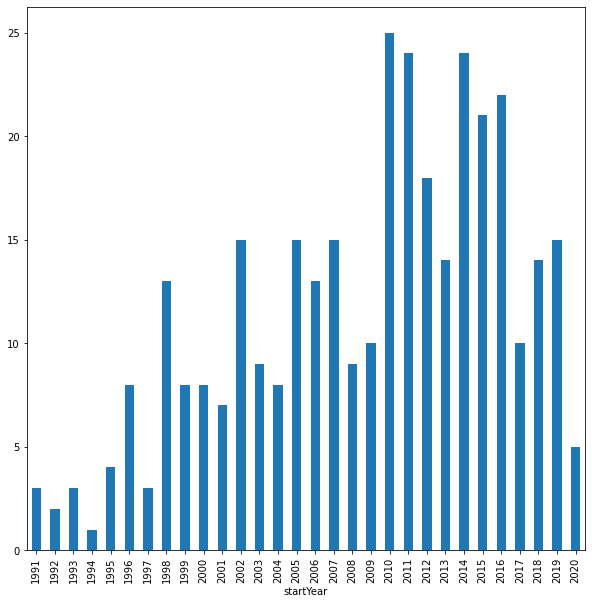

In [ ]:
by_yearx.plot.bar(figsize=(10,10))